<a href="https://colab.research.google.com/github/mpanuluh/dibimbing-13A/blob/main/D9A_Telco_Churn_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#change directory to the dataset location

%cd /content/gdrive/MyDrive/dibimbing/Day 09 Python data cleaning

/content/gdrive/MyDrive/dibimbing/Day 09 Python data cleaning


#Import Packages



*   regex, regular expression,are used by string-searching algorithms for "find" or "find and replace" operations on strings, or for input validation

*   numpy, Numerical Python, it is a core scientific computing library in Python. It provides efficient multi-dimensional array objects and various operations to work with these array objects.

*   pandas, Python Data Analysis Library, takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called data frame that looks very similar to table in a statistical software










In [ ]:
#import packages

import pandas as pd
import numpy as np
import regex as re

#Import Dataset from Kagle (Telecom Churn)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
*   Customers who left within the last month – the column is called Churn

*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

*   Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

*   Demographic info about customers – gender, age range, and if they have partners and dependents








In [ ]:
#import dataset
raw=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#display 5 data sample

df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3655,6878-GGDWG,Female,0,Yes,No,32,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,641.15,No
2512,5829-NVSQN,Female,0,Yes,No,23,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),68.75,1689.45,No
4102,1919-RTPQD,Male,0,Yes,Yes,7,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.75,333.65,No
5233,0302-JOIVN,Female,0,Yes,No,8,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.15,842.9,Yes
4160,5049-MUBWG,Male,0,No,No,26,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),75.00,1908.35,No


In [ ]:
#get dataframe's info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Data Type Conversion

Among all of the data type shown in df.info() only "SeniorCitizen", "tenure" and "MonthlyCharges" that are stored with a non string data type. A conversion need to be done to make an easier anlaysis or easier modeling in the future.

It is find that "TotalCharges" are stored as an object. if object is a string in pandas so it performs a string operation instead of a mathematical one. A conversion need to be done for "TotalCharges" from string to numumeric value.

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#changing "TotalCharges" to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce') #If ‘coerce’, then invalid parsing will be set as NaN

In [ ]:
df['TotalCharges'].dtypes

dtype('float64')

#Missing Value Handling

to clean the dataset we need to first find out which data is missing it could be data that has value NULL, 0, not available

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= customerID =================


9373-WSLOY    1
7876-BEUTG    1
6872-HXFNF    1
2696-ECXKC    1
6917-IAYHD    1
             ..
3528-HFRIQ    1
5996-NRVXR    1
6082-OQFBA    1
9821-POOTN    1
9747-DDZOS    1
Name: customerID, Length: 7043, dtype: int64


============= gender =================


Male      3555
Female    3488
Name: gender, dtype: int64


============= SeniorCitizen =================


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


============= Partner =================


No     3641
Yes    3402
Name: Partner, dtype: int64


============= Dependents =================


No     4933
Yes    2110
Name: Dependents, dtype: int64


============= tenure =================


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


============= PhoneService =================


Yes    6361
No      682
Name: PhoneService, dtype: int64


============= MultipleLines =================


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


============= InternetService =================


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


============= OnlineSecurity =================


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


============= OnlineBackup =================


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


============= DeviceProtection =================


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


============= TechSupport =================


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


============= StreamingTV =================


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


============= StreamingMovies =================


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


============= Contract =================


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


============= MonthlyCharges =================


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64


============= TotalCharges =================


20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64


============= Churn =================


No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df['tenure']==0]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
100*df['TotalCharges'].isnull().sum()/len(df)

0.15618344455487718

In [ ]:
df = df.dropna()
df['TotalCharges'].isnull().sum()

0

#Duplicate value handling

There are no missing value found in this dataset, next stage would be to find duplicated value. It is important to remove any duplicate data to make our data accurate without any redundancy.

In [ ]:
#to show how much percentage does our data has duplicates compared to the whole data

len(df.drop_duplicates()) / len(df)

1.0

In [ ]:
df.duplicated().sum()

0

In [ ]:
#remove Customer ID to simplify feature encoding

df = df.drop(columns=['customerID'])

#Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding. As we already cleaned and check the duplicated data, our dataset is now ready for Feature Encoding.



In [ ]:
for col in df:
    print(str(col) + '' +  str(df[col].unique()))

gender['Female' 'Male']
SeniorCitizen[0 1]
Partner['Yes' 'No']
Dependents['No' 'Yes']
tenure[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService['No' 'Yes']
MultipleLines['No phone service' 'No' 'Yes']
InternetService['DSL' 'Fiber optic' 'No']
OnlineSecurity['No' 'Yes' 'No internet service']
OnlineBackup['Yes' 'No' 'No internet service']
DeviceProtection['No' 'Yes' 'No internet service']
TechSupport['No' 'Yes' 'No internet service']
StreamingTV['No' 'Yes' 'No internet service']
StreamingMovies['No' 'Yes' 'No internet service']
Contract['Month-to-month' 'One year' 'Two year']
PaperlessBilling['Yes' 'No']
PaymentMethod['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges[  29.85 1889.5   108.15 ...  346.45 

In [ ]:
#convert value for categorical variable with 2 possiblities to 0 or 1

df['Churn'] = df['Churn'].replace("No", 0).replace("Yes", 1)
df['PaperlessBilling'] = df['PaperlessBilling'].replace("No", 0).replace("Yes", 1)
df['PhoneService'] = df['PhoneService'].replace("No", 0).replace("Yes", 1)
df['Dependents'] = df['Dependents'].replace("No", 0).replace("Yes", 1)
df['Partner'] = df['Partner'].replace("No", 0).replace("Yes", 1)
df['gender'] = df['gender'].replace("Female", 0).replace("Male", 1)

for col in df:
    print(str(col) + '' +  str(df[col].unique()))


gender[0 1]
SeniorCitizen[0 1]
Partner[1 0]
Dependents[0 1]
tenure[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService[0 1]
MultipleLines['No phone service' 'No' 'Yes']
InternetService['DSL' 'Fiber optic' 'No']
OnlineSecurity['No' 'Yes' 'No internet service']
OnlineBackup['Yes' 'No' 'No internet service']
DeviceProtection['No' 'Yes' 'No internet service']
TechSupport['No' 'Yes' 'No internet service']
StreamingTV['No' 'Yes' 'No internet service']
StreamingMovies['No' 'Yes' 'No internet service']
Contract['Month-to-month' 'One year' 'Two year']
PaperlessBilling[1 0]
PaymentMethod['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn[0 1]


In [ ]:
ohe_df=pd.get_dummies(df)

ohe_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [ ]:
for col in ohe_df:
    print(str(col) + '' +  str(ohe_df[col].unique()))

gender[0 1]
SeniorCitizen[0 1]
Partner[1 0]
Dependents[0 1]
tenure[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService[0 1]
PaperlessBilling[1 0]
MonthlyCharges[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn[0 1]
MultipleLines_No[0 1]
MultipleLines_No phone service[1 0]
MultipleLines_Yes[0 1]
InternetService_DSL[1 0]
InternetService_Fiber optic[0 1]
InternetService_No[0 1]
OnlineSecurity_No[1 0]
OnlineSecurity_No internet service[0 1]
OnlineSecurity_Yes[0 1]
OnlineBackup_No[0 1]
OnlineBackup_No internet service[0 1]
OnlineBackup_Yes[1 0]
DeviceProtection_No[1 0]
DeviceProtection_No internet service[0 1]
DeviceProtection_Yes[0 1]
TechSupport_No[1 0]
TechSupport_No internet service[0 1]
TechSupport_Yes[0 1]
StreamingTV_No[1 0]
StreamingTV_No inte

#Outlier Handling

There are still three more objects that may has oulier, showing their boxplot will give us an idea whether we need to handle it or not

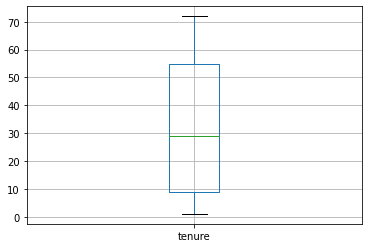

In [ ]:
ohe_df[['tenure']].boxplot()

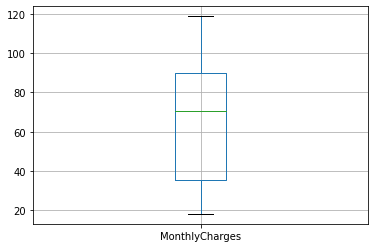

In [ ]:
ohe_df[['MonthlyCharges']].boxplot()

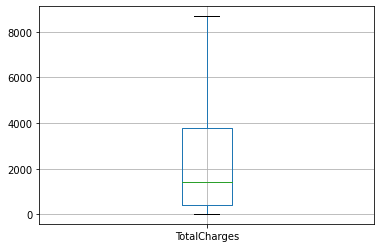

In [ ]:
ohe_df[['TotalCharges']].boxplot()

#Fature Scaling

Feature scaling is essential for machine learning algorithms that calculate distances between data. One of the feature scaling method is Standardized value = X – μ / σ which will use in this dataset for column tenure, monthly charges and total charges

In [ ]:
def standardized(series_col):
    return (series_col - series_col.mean()) / series_col.std()

In [ ]:
ohe_df['tenure']=standardized(ohe_df['tenure'])
ohe_df['MonthlyCharges']=standardized(ohe_df['MonthlyCharges'])
ohe_df['TotalCharges']=standardized(ohe_df['TotalCharges'])

In [ ]:
for col in ohe_df:
    print(str(col) + '' +  str(ohe_df[col].unique()))

gender[0 1]
SeniorCitizen[0 1]
Partner[1 0]
Dependents[0 1]
tenure[-1.280157    0.06429811 -1.23941594  0.51244982 -0.99496955 -0.42459466
 -0.91348743 -0.18014827  1.20504791 -0.79126423 -0.66904104  1.04208365
  0.67541407 -0.30237146  1.49023536  0.79763727  1.57171749 -0.46533572
 -0.8320053  -0.09866614  0.59393195  1.61245855 -0.62829998 -0.22088934
 -1.11719275  0.55319088 -0.87274636  1.53097642  1.24578897  0.43096769
 -0.70978211  1.12356578 -0.58755891  1.36801217 -0.95422849 -1.19867488
 -0.05792508  0.71615514  1.28653004  0.96060152 -1.03571062  0.39022663
  0.10503918  0.63467301 -0.13940721  1.3272711   0.22726237  1.44949429
 -0.01718402  0.91986046  0.18652131  0.14578024  0.34948556 -1.07645168
 -1.15793381  0.02355705  1.40875323 -0.38385359  1.00134259  1.16430684
 -0.75052317 -0.50607678  0.83837833  0.3087445   1.08282472 -0.34311253
  0.47170875 -0.54681785  0.8791194   0.7568962  -0.2616304   0.26800343]
PhoneService[0 1]
PaperlessBilling[1 0]
MonthlyCharges[-1